In [1]:
import numpy as np
# install ucimlrepo, pandas, matplotlib packages

from ucimlrepo import fetch_ucirepo 

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
x = adult.data.features 
y = adult.data.targets 

# shape of data
x.shape, y.shape

((48842, 14), (48842, 1))

In [3]:
# look for null values, data types
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [4]:
# look for null values, data types
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [5]:
import pandas as pd

In [6]:
df = pd.concat([x, y], axis=1)
df.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4534,20,Private,174391,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,<=50K
42663,60,Private,23063,7th-8th,4,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K.
41233,43,Private,186077,HS-grad,9,Widowed,Transport-moving,Unmarried,Black,Male,0,0,40,United-States,<=50K.


In [7]:
df.duplicated().value_counts()

False    48813
True        29
Name: count, dtype: int64

In [8]:
df = df.drop_duplicates(keep='first')
df.shape

(48813, 15)

In [9]:
# view unique values with value counts
df['income'].value_counts()

income
<=50K     24698
<=50K.    12430
>50K       7839
>50K.      3846
Name: count, dtype: int64

In [10]:
def process_income(income):
    if income == '>50K.':
        return 1
    elif income == '<=50K.':
        return 0
    elif income == '>50K':
        return 1
    elif income == '<=50K':
        return 0
    
df['income'] = df['income'].apply(process_income)
df['income'].value_counts()

income
0    37128
1    11685
Name: count, dtype: int64

In [11]:
import seaborn as sns

<Axes: >

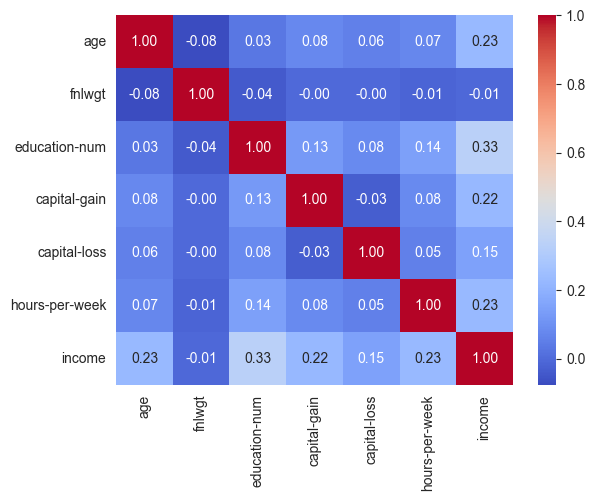

In [12]:
neumerical_features = df.select_dtypes(include=['int64'])
corr_metrics = neumerical_features.corr()
sns.heatmap(corr_metrics, annot=True, fmt='.2f', cmap='coolwarm')

In [13]:
df['age'].describe()

count    48813.000000
mean        38.647348
std         13.709005
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [14]:
from matplotlib import pyplot as plt

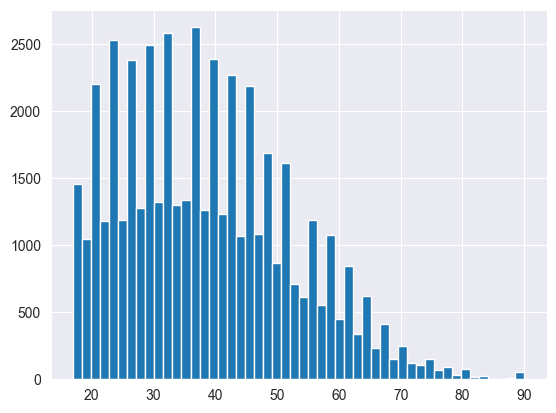

In [15]:
plt.hist(df['age'], bins=50)
plt.show()

In [16]:
(df['age'] > 80).sum()

147

In [17]:
age_filter_1 = df['age'] > 80
df.loc[age_filter_1]['age'].value_counts()

age
90    54
81    37
82    15
84    13
83    11
88     6
85     5
87     3
89     2
86     1
Name: count, dtype: int64

In [18]:
age_filter_2 = df['age'] > 80
age_filter_3 = df['age'] < 90
df.loc[age_filter_2 & age_filter_3, 'age'] = (80 + 90)/ 2
df.loc[age_filter_1]['age'].value_counts()

age
85    93
90    54
Name: count, dtype: int64

In [19]:
df['workclass'] = df['workclass'].fillna('Unknown')

In [20]:
df['workclass'].value_counts()

workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1694
Federal-gov          1432
Unknown               963
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [21]:
workclass_filt_1 = df['workclass'] == 'Without-pay'
workclass_filt_2 = df['workclass'] == 'Never-worked'

df.loc[workclass_filt_1 | workclass_filt_2, 'income'].value_counts()

income
0    29
1     2
Name: count, dtype: int64

In [22]:
indices = df[(workclass_filt_1 | workclass_filt_2) & (df['income'] == '>50K')].index
df = df.drop(indices)
df.shape

(48813, 15)

In [23]:
def process_workclass(workclass):
    if workclass == '?':
        return 'Unknown'
    elif workclass in ['Without-pay', 'Never-worked']:
        return 'Unemployed'
    else:
        return workclass
    
df['workclass'] = df['workclass'].apply(process_workclass)
df['workclass'].value_counts()

workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
Unknown              2799
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Unemployed             31
Name: count, dtype: int64

In [24]:
df['education'].value_counts()

education
HS-grad         15777
Some-college    10869
Bachelors        8020
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              656
Doctorate         594
5th-6th           508
1st-4th           245
Preschool          82
Name: count, dtype: int64

In [25]:
filt_preschool = (df['education'] == 'Preschool')
df.loc[filt_preschool, 'income'].value_counts()

income
0    81
1     1
Name: count, dtype: int64

In [26]:
filt_preschool_50 = (df['education'] == 'Preschool') & (df['income'] == '>50K')
df.loc[filt_preschool_50]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [27]:
df = df[~filt_preschool]

In [28]:
filt_1_4 = df['education'] == '1st-4th'
df.loc[filt_1_4, 'income'].value_counts()

income
0    237
1      8
Name: count, dtype: int64

In [29]:
filt_1_4_50 = (df['education'] == '1st-4th') & (df['income'] == '>50K')
df.loc[filt_1_4_50]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [30]:
def process_education(education):
    if education in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
        return 'Other'
    else:
        return education
    
df['education'] = df['education'].apply(process_education)

In [31]:
df['education-num'].value_counts()

education-num
9     15777
10    10869
13     8020
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       656
16      594
3       508
2       245
Name: count, dtype: int64

In [32]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22342
Never-married            16061
Divorced                  6628
Separated                 1527
Widowed                   1513
Married-spouse-absent      623
Married-AF-spouse           37
Name: count, dtype: int64

In [33]:
filt_af_spouse = df['marital-status'] == 'Married-AF-spouse'
df.loc[filt_af_spouse, 'income'].value_counts()

income
0    23
1    14
Name: count, dtype: int64

In [34]:
df['occupation'].value_counts()

occupation
Prof-specialty       6166
Craft-repair         6101
Exec-managerial      6083
Adm-clerical         5605
Sales                5502
Other-service        4897
Machine-op-inspct    3007
Transport-moving     2353
Handlers-cleaners    2066
?                    1838
Farming-fishing      1471
Tech-support         1445
Protective-serv       983
Priv-house-serv       238
Armed-Forces           15
Name: count, dtype: int64

In [35]:
df['occupation'] = df['occupation'].fillna('Unknown')

In [36]:
df['occupation'] = df['occupation'].apply(lambda x : 'Unknown' if x == '?' else x)

In [37]:
filt_af = df['occupation'] == 'Armed-Forces'
df.loc[filt_af, 'income'].value_counts()

income
0    10
1     5
Name: count, dtype: int64

In [38]:
df['relationship'].value_counts()

relationship
Husband           19686
Not-in-family     12530
Own-child          7569
Unmarried          5118
Wife               2328
Other-relative     1500
Name: count, dtype: int64

In [39]:
filt_unmarried = df['relationship'] == 'Unmarried'
df.loc[filt_unmarried, 'marital-status'].value_counts()

marital-status
Divorced                 2367
Never-married            1331
Separated                 667
Widowed                   571
Married-spouse-absent     182
Name: count, dtype: int64

In [40]:
df['race'].value_counts()

race
White                 41676
Black                  4671
Asian-Pac-Islander     1511
Amer-Indian-Eskimo      469
Other                   404
Name: count, dtype: int64

In [41]:
df['sex'].value_counts()

sex
Male      32573
Female    16158
Name: count, dtype: int64

In [42]:
df['capital-gain'].describe()

count    48731.000000
mean      1080.278775
std       7457.845129
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [43]:
(df['capital-loss'] == 0).sum()

46451

{'whiskers': [<matplotlib.lines.Line2D at 0x13cc1a4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x13cc1aa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x13cc1a250>],
 'medians': [<matplotlib.lines.Line2D at 0x13cc1af70>],
 'fliers': [<matplotlib.lines.Line2D at 0x13cc28250>],
 'means': []}

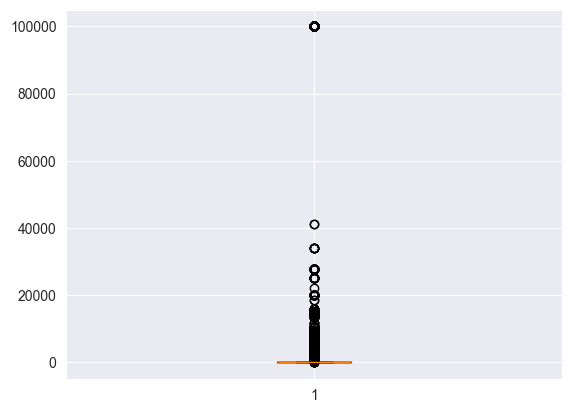

In [44]:
plt.boxplot(df['capital-gain'])

In [45]:
filt_cp_gain_out = df['capital-gain'] > 80000
df['capital-gain'] = np.where(filt_cp_gain_out, np.mean(df[~filt_cp_gain_out]['capital-gain']), df['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13cc8b310>,
 'caps': [<matplotlib.lines.Line2D at 0x13cc8b850>,
 'boxes': [<matplotlib.lines.Line2D at 0x13cc8b070>],
 'medians': [<matplotlib.lines.Line2D at 0x13cc8bd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x13cc99070>],
 'means': []}

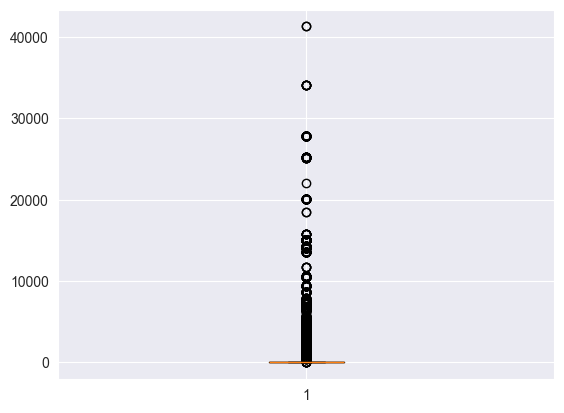

In [46]:
plt.boxplot(df['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13cced970>,
 'caps': [<matplotlib.lines.Line2D at 0x13cced6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13cced6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x13ccedee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13cd031c0>],
 'means': []}

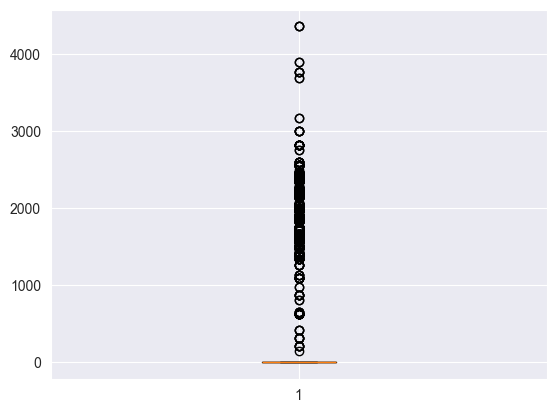

In [47]:
plt.boxplot(df['capital-loss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13cd52c70>,
 'caps': [<matplotlib.lines.Line2D at 0x13cd651f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13cd52940>],
 'medians': [<matplotlib.lines.Line2D at 0x13cd65730>],
 'fliers': [<matplotlib.lines.Line2D at 0x13cd659d0>],
 'means': []}

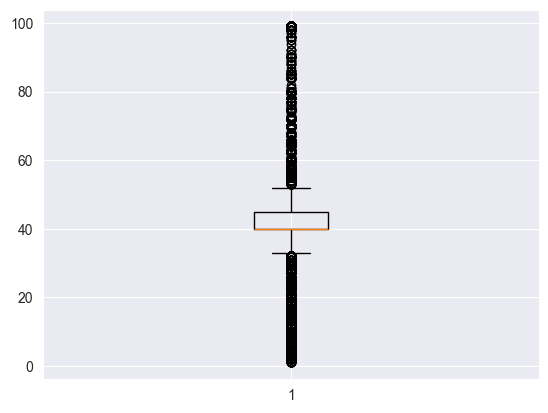

In [48]:
plt.boxplot(df['hours-per-week'])

In [49]:
df['race'].value_counts()

race
White                 41676
Black                  4671
Asian-Pac-Islander     1511
Amer-Indian-Eskimo      469
Other                   404
Name: count, dtype: int64

In [50]:
df['hours-per-week'].describe()

count    48731.000000
mean        40.431820
std         12.391553
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [51]:
df['native-country'].value_counts()

native-country
United-States                 43786
Mexico                          917
?                               581
Philippines                     293
Germany                         206
Puerto-Rico                     183
Canada                          182
India                           150
El-Salvador                     148
Cuba                            138
England                         127
China                           120
South                           114
Italy                           105
Jamaica                         105
Dominican-Republic              101
Japan                            92
Poland                           87
Vietnam                          86
Columbia                         85
Guatemala                        84
Haiti                            71
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        48
Peru         

In [52]:
df['native-country'] = df['native-country'].apply(lambda x : 'Other' if x != 'United-States' else x)

In [53]:
df['native-country'].value_counts()

native-country
United-States    43786
Other             4945
Name: count, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48731 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48731 non-null  int64  
 1   workclass       48731 non-null  object 
 2   fnlwgt          48731 non-null  int64  
 3   education       48731 non-null  object 
 4   education-num   48731 non-null  int64  
 5   marital-status  48731 non-null  object 
 6   occupation      48731 non-null  object 
 7   relationship    48731 non-null  object 
 8   race            48731 non-null  object 
 9   sex             48731 non-null  object 
 10  capital-gain    48731 non-null  float64
 11  capital-loss    48731 non-null  int64  
 12  hours-per-week  48731 non-null  int64  
 13  native-country  48731 non-null  object 
 14  income          48731 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 5.9+ MB


In [55]:
from sklearn.decomposition import PCA

In [56]:
filt_pca = df[['fnlwgt', 'capital-gain', 'capital-loss']]

In [57]:
pca = PCA(n_components= 1)
pca_components = pca.fit_transform(filt_pca)

In [58]:
pca_components

array([[-112069.19984113],
       [-106274.03558445],
       [  26060.9640171 ],
       ...,
       [ 185397.96353734],
       [-105694.44778278],
       [  -7437.03588204]])

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc = StandardScaler()
pca_components = sc.fit_transform(pca_components)

In [61]:
df = df.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss'])
x = df.drop(columns=['income'])
x['pca'] = pca_components
y = df['income']

In [62]:
from imblearn.over_sampling import RandomOverSampler

<Axes: xlabel='income'>

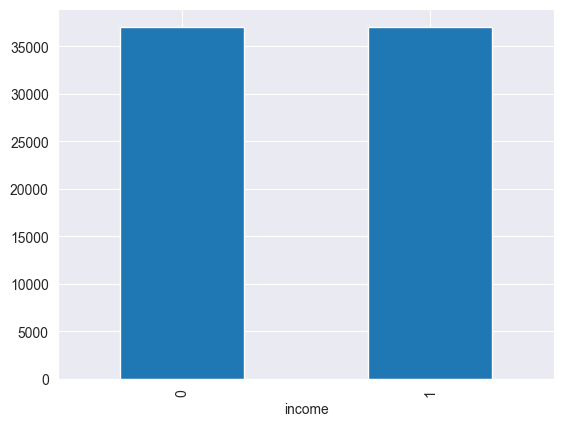

In [63]:
oversample = RandomOverSampler(random_state=42)
x, y = oversample.fit_resample(x, y)
y.value_counts().plot(kind = 'bar')

In [64]:
x = pd.get_dummies(x)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

((51865, 58), (22229, 58))

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [68]:
gaussian_model = GaussianNB()
gaussian_model.fit(x_train,y_train)
pred = gaussian_model.predict(x_test)
accuracy_score(y_test,pred)

0.7859102973593054

In [69]:
from sklearn.naive_bayes import BernoulliNB

In [70]:
bernouli_model = BernoulliNB()
bernouli_model.fit(x_train,y_train)
pred = bernouli_model.predict(x_test)
accuracy_score(y_test,pred)

0.7659363894012327

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {
    'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
}

In [73]:
grid_search_gaussian = GridSearchCV(estimator = gaussian_model,param_grid = param_grid)
grid_search_gaussian.fit(x_train,y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7],
                                    [0.4, 0.6], [0.5, 0.5], [0.6, 0.4],
                                    [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [74]:
grid_search_gaussian.best_params_

{'priors': [0.9, 0.1], 'var_smoothing': 0.0001}

In [75]:
grid_search_gaussian.score(x_test,y_test)

0.7923883215619236

In [76]:
y_pred = grid_search_gaussian.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_test, y_pred)

array([[8591, 2513],
       [2102, 9023]])

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79     11104
           1       0.78      0.81      0.80     11125

    accuracy                           0.79     22229
   macro avg       0.79      0.79      0.79     22229
weighted avg       0.79      0.79      0.79     22229


In [81]:
from sklearn.metrics import roc_auc_score

In [82]:
print(roc_auc_score(y_test, y_pred))

0.7923706691383609


In [83]:
from sklearn.metrics import roc_curve

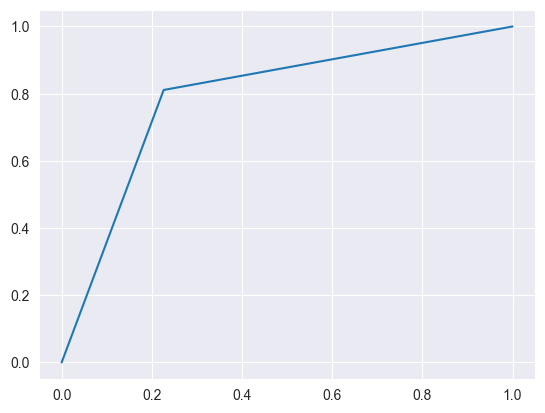

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

In [85]:
from sklearn.ensemble import RandomForestClassifier

Text(0, 0.5, 'Accuracy')

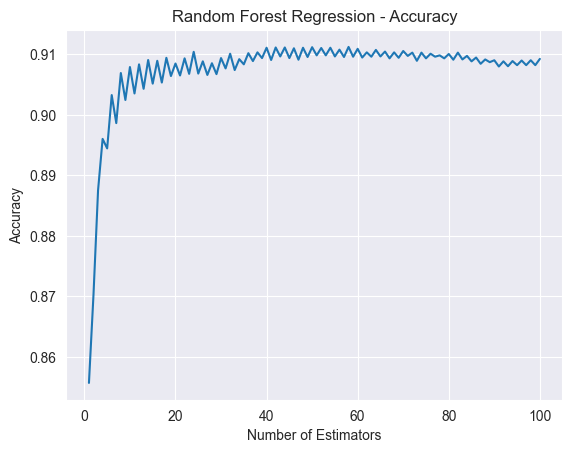

In [86]:
test_acc_list = []

for i in range(1, 101):
    rf_model = RandomForestClassifier(n_estimators=i, random_state=42)
    rf_model.fit(x_train, y_train)
    
    # testing set
    test_pred = rf_model.predict(x_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

plt.plot(range(1, 101), test_acc_list)
plt.title('Random Forest Regression - Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

In [87]:
rf_model = RandomForestClassifier(n_estimators=40, random_state=42)
rf_model.fit(x_train, y_train)
test_pred = rf_model.predict(x_test)
accuracy_score(y_test, test_pred)

0.9111071123307392

In [88]:
param_grid = {
    'n_estimators': [40],
    'random_state': [42],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'warm_start': [True, False]
}

In [89]:
grid_search_rf = GridSearchCV(estimator = rf_model,param_grid = param_grid)
grid_search_rf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=40, random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'n_estimators': [40],
                         'random_state': [42], 'warm_start': [True, False]})

In [90]:
grid_search_rf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'n_estimators': 40,
 'random_state': 42,
 'warm_start': True}

In [91]:
grid_search_rf.score(x_test,y_test)

0.9159656304827027

In [92]:
y_pred = grid_search_rf.predict(x_test)

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
confusion_matrix(y_test, y_pred)

array([[ 9796,  1308],
       [  560, 10565]])

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     11104
           1       0.89      0.95      0.92     11125

    accuracy                           0.92     22229
   macro avg       0.92      0.92      0.92     22229
weighted avg       0.92      0.92      0.92     22229


In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
print(roc_auc_score(y_test, y_pred))

0.9159337661496616


In [99]:
from sklearn.metrics import roc_curve

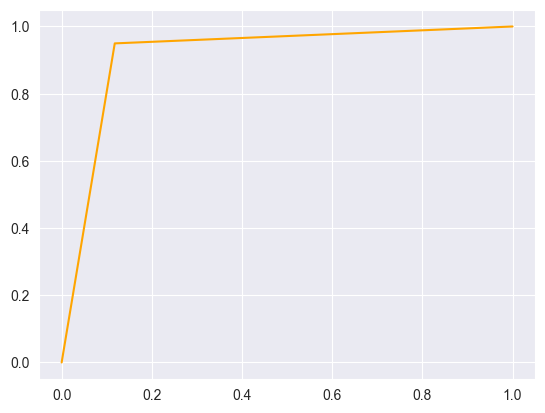

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')